In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r'E:\learning_bullshit\100daysML\sample_data\placement.csv')

In [36]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [7]:
df.shape

(100, 4)

### Steps
- Preprocess - EDA - feauture selection
- Extract input and output rows
- Scale the values
- Train test split
- Train the model
- Evaluate the model, model selection
- Deploy the model

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [9]:
df = df.iloc[:,1:]

In [8]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


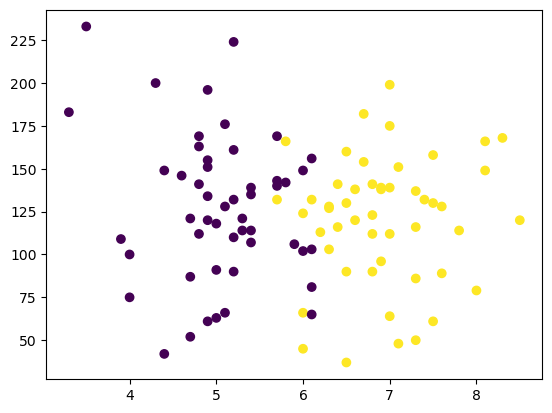

In [10]:
plt.scatter(df['cgpa'], df['iq'], c = df['placement'])
# yellow - placement atthnd
# purple - placement ayeji

cgpa , iq = independent variable\
placement = dependent variable

In [11]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [12]:
x.head() # 2d tensor

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [13]:
y.head() # 1d tensor

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1) # 10% data goes to test

In [16]:
x_train

,cgpa,iq
14,6.1,103.0
47,5.2,161.0
30,7.6,128.0
15,5.1,176.0
49,5.4,135.0
...,...,...
76,4.9,155.0
53,8.3,168.0
6,5.7,143.0
71,6.1,132.0


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
x_train = scaler.fit_transform(x_train)

In [20]:
x_train

array([[ 0.0920343 , -0.5217251 ],
       [-0.67649951,  0.93620051],
       [ 1.37292398,  0.10669111],
       [-0.76189216,  1.31325024],
       [-0.50571422,  0.28264765],
       [ 0.68978281, -0.29549527],
       [-0.84728481, -0.14467538],
       [-0.67649951, -0.34576857],
       [ 0.86056811,  1.89139315],
       [ 0.86056811, -1.5020544 ],
       [ 1.28753133, -1.57746434],
       [-0.93267745,  1.81598321],
       [ 0.77517546,  0.35805759],
       [ 1.11674604,  0.33292094],
       [-1.70121126, -1.22555126],
       [ 0.43360488, -0.84850154],
       [ 0.51899752, -0.09440208],
       [ 0.68978281,  0.43346754],
       [-0.16414364,  0.45860419],
       [ 0.00664165, -0.54686175],
       [ 0.26281959,  0.08155446],
       [ 0.94596075, -1.90424077],
       [-1.0180701 , -0.29549527],
       [-0.50571422, -0.24522197],
       [ 0.68978281, -0.01899213],
       [ 0.86056811,  0.38319424],
       [ 1.20213869,  0.2072377 ],
       [-1.0180701 ,  0.43346754],
       [-0.67649951,

In [21]:
x_test = scaler.transform(x_test)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
clf = LogisticRegression()

In [24]:
clf.fit(x_train, y_train) # used to train model by providing training data

LogisticRegression()

## model evaluation

In [25]:
y_pred = clf.predict(x_test)

In [26]:
y_test

36    0
16    0
7     0
46    0
13    1
98    1
2     0
66    1
83    1
99    1
Name: placement, dtype: int64

In [27]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_test, y_pred) # 0.9 => 90% accuracy

1.0

In [31]:
from mlxtend.plotting import plot_decision_regions

In [32]:
## !pip install mlxtend

<Axes: >

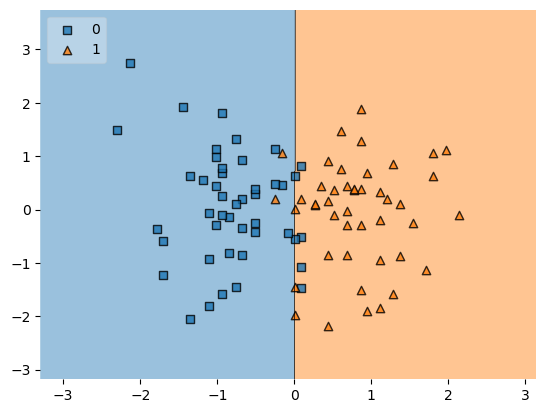

In [33]:
plot_decision_regions(x_train, y_train.values, clf = clf, legend = 2 )

In [34]:
import pickle # converts an object to a file which can be later used to deploy in a website

In [35]:
pickle.dump(clf, open('model.pkl', 'wb'))

<img src = 'http://localhost:8889/kernelspecs/python3/logo-64x64.png' />